<a href="https://colab.research.google.com/github/RafaelAsafe/Data-Science/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Seaborn

carregando tabela disponível do git repositório covid

link: https://github.com/covid19br

In [1]:
!wget https://raw.githubusercontent.com/covid19br/covid19br.github.io/master/dados/BrasilCov19.csv


--2022-06-10 05:16:44--  https://raw.githubusercontent.com/covid19br/covid19br.github.io/master/dados/BrasilCov19.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10172 (9.9K) [text/plain]
Saving to: ‘BrasilCov19.csv’

BrasilCov19.csv     100%[===================>]   9.93K  --.-KB/s    in 0s      

2022-06-10 05:16:44 (68.5 MB/s) - ‘BrasilCov19.csv’ saved [10172/10172]



Adicionando algumas bibliotecas

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

definindo a tabela como um dataframe do pandas

In [7]:
brasil_data = pd.read_csv('BrasilCov19.csv')
brasil_data.head()


,data,novos.casos,casos.acumulados,obitos.novos,obitos.acumulados
0,2020-02-25,0,0,0,0
1,2020-02-26,1,1,0,0
2,2020-02-27,0,1,0,0
3,2020-02-28,0,1,0,0
4,2020-02-29,1,2,0,0


Criando um gráfico simples com seaborn e utilizando o matplotlib para fazer pequenos ajustes.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

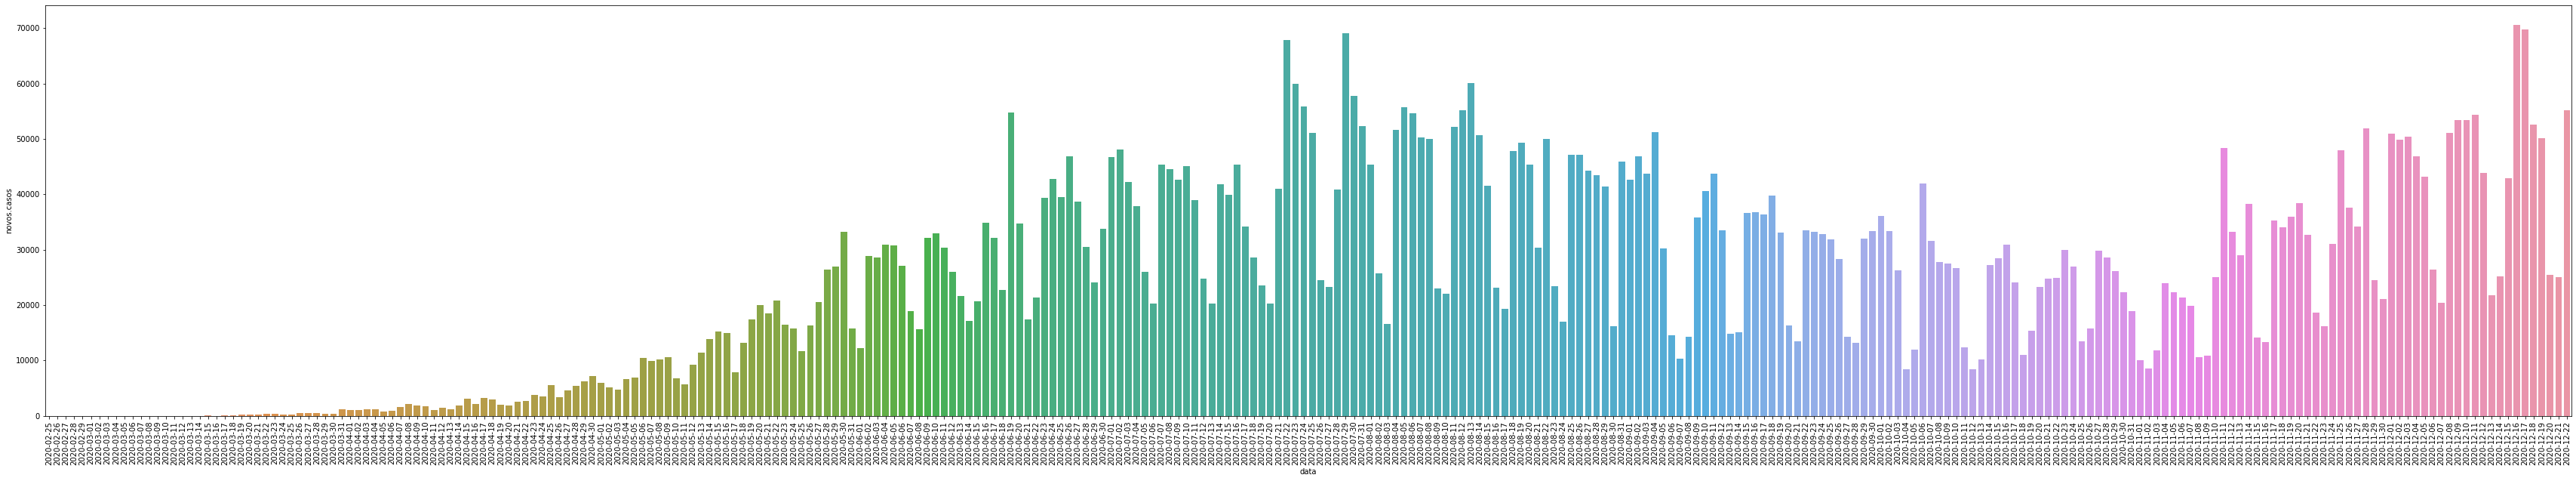

In [17]:
plt.figure(figsize=(60,10))
sns.barplot(data=brasil_data, x='data',y= 'novos.casos', )
plt.xticks(rotation=90)

vamos otimizar esse gráfico

vamos unir os dados por  meses.


In [62]:
dados_por_mes =brasil_data.groupby(pd.to_datetime(brasil_data.data).dt.month).sum()
dados_por_mes.reset_index(inplace=True)
dados_por_mes.rename(columns={'data': 'Data'}, inplace = True)
dados_por_mes.head()


,Data,novos.casos,casos.acumulados,obitos.novos,obitos.acumulados
0,2,2,5,0,0
1,3,5715,37144,201,981
2,4,79663,1037901,5700,66004
3,5,428820,7928882,23413,508032
4,6,887841,28162919,30280,1353418


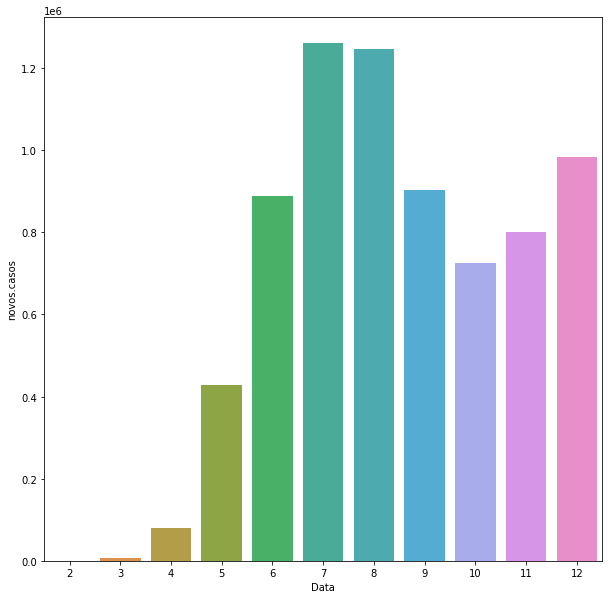

In [114]:
plt.figure(figsize=(10,10))
sns.barplot(data=dados_por_mes, x = 'Data' , y= 'novos.casos', )


Somar a cada 7 dias 

In [128]:
dados_semana = brasil_data.groupby(brasil_data.index // 7).sum()
dados_semana.drop(['casos.acumulados','obitos.acumulados'],axis=1,inplace=True)
df = brasil_data['data']
datas = df.iloc[6::7]
datas.append
datas = datas.reset_index(drop=True)
dados_semana['Data'] = datas
dados_semana.drop(43,axis=0,inplace=True)

     


Realizar o plot quinzenal

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

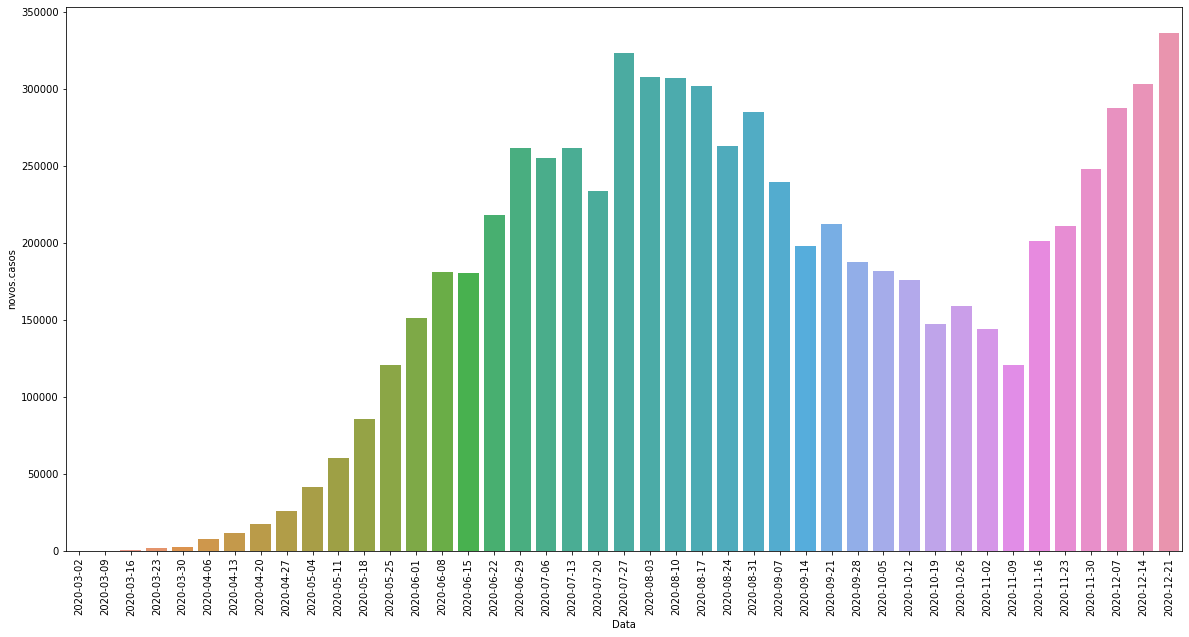

In [127]:
plt.figure(figsize=(20,10))
sns.barplot(data= dados_semana, x = 'Data' , y= 'novos.casos', )
plt.xticks(rotation=90)